In [1]:
import pandas as pd
# from sklearn.model_selection import train_test_split
import ensemble_model.preprocesser as preprocesser 
import ensemble_model.attention_model as attention_model 
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer, RobertaModel, RobertaTokenizer
# import whatthepatch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

In [2]:
# df['command'] = df['diff'].apply(lambda x : extract_lines(find_longest_list([y.changes for y in whatthepatch.parse_patch(x)])))
# extracted_cols = df['diff'].str.extract(r'^diff --git (?P<source>[^\t\n]+) (?P<target>[^\t\n]+)')
# whatthepatch.apply_diff(diff, lao)

In [3]:
# len(df_dataset)

In [4]:
# df_dataset[0]

In [5]:
# Load BERT and CodeBERT models and tokenizers
bert_model = BertModel.from_pretrained('./models/bert-base-cased')
bert_tokenizer = BertTokenizer.from_pretrained('./models/bert-base-cased')

codebert_model = RobertaModel.from_pretrained('./models/codebert-base')
codebert_tokenizer = RobertaTokenizer.from_pretrained('./models/codebert-base')

/root/miniconda3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/root/miniconda3/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [6]:
# train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
# test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
val = pd.read_csv('./datasets/val.csv')
train.dropna(inplace=True)
test.dropna(inplace=True)
val.dropna(inplace=True)

train.reset_index(inplace=True)
test.reset_index(inplace=True)
val.reset_index(inplace=True)

In [7]:


# Create Datasets and DataLoaders
train_dataset = preprocesser.SentencePairDataset(train, bert_tokenizer, codebert_tokenizer,message='message',command='diff',label='label')
val_dataset = preprocesser.SentencePairDataset(val, bert_tokenizer, codebert_tokenizer,message='message',command='diff',label='label')
test_dataset = preprocesser.SentencePairDataset(test, bert_tokenizer, codebert_tokenizer,message='message',command='diff',label='label')

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



# # Initialize the model
# model = em.CombinedModel(bert_model, codebert_model, bert_tokenizer, codebert_tokenizer)

# # Train the model
# model.trainer(train_loader, val_loader,num_epochs=10)
# for batch in train_loader:
#     print(batch)


base_model1 = attention_model.BaseModel(bert_model,bert_tokenizer)
base_model2 = attention_model.BaseModel(codebert_model,codebert_tokenizer)

# Create stacking model
atten_model = attention_model.AttentionMoEModel(base_model1, base_model2)
# Train the model
atten_model.trainer(train_loader, val_loader,num_epochs=10, patience=3)

/root/miniconda3/lib/python3.10/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1/10 Loss: 0.5444: 100%|██████████| 221/221 [09:37<00:00,  1.12batch/s]

=============================train========================
=============================eval========================


Epoch 1/10 Loss: 0.5444: 100%|██████████| 221/221 [11:28<00:00,  3.12s/batch]


Validation Accuracy: 0.6211
Precision: 0.3858
Recall: 0.6211
F1-Score: 0.4759
Epoch 1/10, Validation Accuracy: 0.6211015262110152
当前best acc 0.6211015262110152


Epoch 2/10 Loss: 0.3080: 100%|██████████| 221/221 [10:03<00:00,  2.73s/batch]


Validation Accuracy: 0.8062
Precision: 0.8397
Recall: 0.8062
F1-Score: 0.7889
Epoch 2/10, Validation Accuracy: 0.8062375580623756
当前best acc 0.8062375580623756


Epoch 3/10 Loss: 0.2091: 100%|██████████| 221/221 [09:05<00:00,  1.20batch/s]

=============================train========================
=============================eval========================


Epoch 3/10 Loss: 0.2091: 100%|██████████| 221/221 [10:43<00:00,  2.91s/batch]


Validation Accuracy: 0.8726
Precision: 0.8806
Recall: 0.8726
F1-Score: 0.8683
Epoch 3/10, Validation Accuracy: 0.8725945587259456
当前best acc 0.8725945587259456


Epoch 4/10 Loss: 0.1650: 100%|██████████| 221/221 [08:20<00:00,  1.27batch/s]

=============================train========================
=============================eval========================


Epoch 4/10 Loss: 0.1650: 100%|██████████| 221/221 [10:00<00:00,  2.72s/batch]


Validation Accuracy: 0.8819
Precision: 0.8813
Recall: 0.8819
F1-Score: 0.8811
Epoch 4/10, Validation Accuracy: 0.8818845388188454
当前best acc 0.8818845388188454


Epoch 5/10 Loss: 0.1355: 100%|██████████| 221/221 [09:19<00:00,  1.29batch/s]

=============================train========================
=============================eval========================


Epoch 5/10 Loss: 0.1355: 100%|██████████| 221/221 [10:54<00:00,  2.96s/batch]


Validation Accuracy: 0.8832
Precision: 0.8827
Recall: 0.8832
F1-Score: 0.8828
Epoch 5/10, Validation Accuracy: 0.8832116788321168
当前best acc 0.8832116788321168


Epoch 6/10 Loss: 0.1135: 100%|██████████| 221/221 [08:25<00:00,  1.21batch/s]

=============================train========================
=============================eval========================


Epoch 6/10 Loss: 0.1135: 100%|██████████| 221/221 [10:02<00:00,  2.73s/batch]


Validation Accuracy: 0.8825
Precision: 0.8831
Recall: 0.8825
F1-Score: 0.8828
Epoch 6/10, Validation Accuracy: 0.8825481088254811
比best acc差记一次 0


Epoch 7/10 Loss: 0.0770: 100%|██████████| 221/221 [08:42<00:00,  1.24batch/s]

=============================train========================
=============================eval========================


Epoch 7/10 Loss: 0.0770: 100%|██████████| 221/221 [10:19<00:00,  2.80s/batch]


Validation Accuracy: 0.8666
Precision: 0.8731
Recall: 0.8666
F1-Score: 0.8679
Epoch 7/10, Validation Accuracy: 0.8666224286662243
比best acc差记一次 1


Epoch 8/10 Loss: 0.0470: 100%|██████████| 221/221 [09:34<00:00,  1.23batch/s]

=============================train========================
=============================eval========================


Epoch 8/10 Loss: 0.0470: 100%|██████████| 221/221 [11:13<00:00,  3.05s/batch]


Validation Accuracy: 0.8938
Precision: 0.8935
Recall: 0.8938
F1-Score: 0.8931
Epoch 8/10, Validation Accuracy: 0.893828798938288
当前best acc 0.893828798938288


Epoch 9/10 Loss: 0.0464: 100%|██████████| 221/221 [08:51<00:00,  1.28batch/s]

=============================train========================
=============================eval========================


Epoch 9/10 Loss: 0.0464: 100%|██████████| 221/221 [10:26<00:00,  2.84s/batch]


Validation Accuracy: 0.8958
Precision: 0.8967
Recall: 0.8958
F1-Score: 0.8944
Epoch 9/10, Validation Accuracy: 0.8958195089581951
当前best acc 0.8958195089581951


Epoch 10/10 Loss: 0.0372: 100%|██████████| 221/221 [08:43<00:00,  1.27batch/s]

=============================train========================
=============================eval========================


Epoch 10/10 Loss: 0.0372: 100%|██████████| 221/221 [10:21<00:00,  2.81s/batch]

Validation Accuracy: 0.8965
Precision: 0.8962
Recall: 0.8965
F1-Score: 0.8963
Epoch 10/10, Validation Accuracy: 0.8964830789648308
当前best acc 0.8964830789648308


In [8]:
test_acc, test_labels, test_probabilities, test_embeddings, test_predictions = atten_model.evaluate(test_loader)

Validation Accuracy: 0.8920
Precision: 0.8923
Recall: 0.8920
F1-Score: 0.8921


In [9]:
res = test.copy()

In [10]:
len(test_labels)

1509

In [11]:
len(test_probabilities)

1509

In [12]:
# test_embeddings

In [13]:
len(test_embeddings)

1509

In [14]:
res['test_labels'] = test_labels
res['test_probabilities'] = test_probabilities
res['test_embeddings'] = test_embeddings
res['test_predictions'] = test_predictions

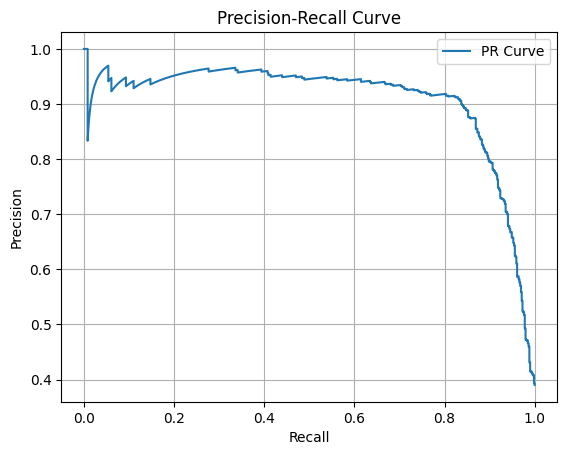

In [ ]:
# PR curve
atten_model.plot_pr_curve(test_labels, test_probabilities)
# Plot t-SNE for the best model

In [ ]:
test_embeddings[0].shape

(1536,)

embedding来啦 (1536,)


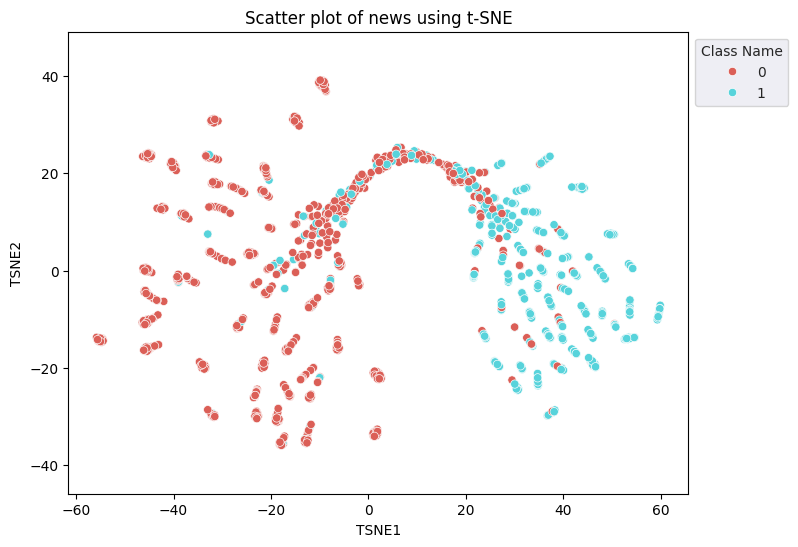

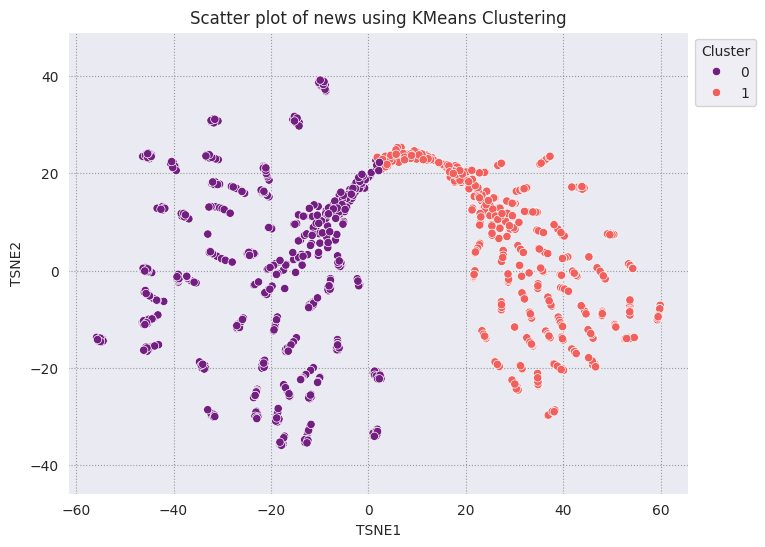

In [ ]:
# cluster to show the quality of embeddings
atten_model.plot_tsne(test_embeddings, test_labels)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix on Dataset I', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    # plt.xlabel('Predicted label')
    plt.tight_layout()

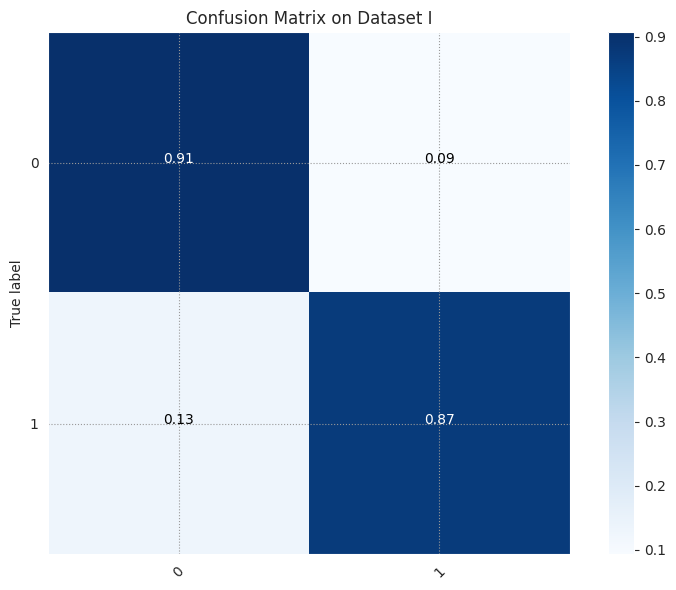

In [ ]:
cm = confusion_matrix(test_labels, test_predictions)

# Call the function to plot the confusion matrix
class_names = test['label'].unique()  # Replace with your class names
plot_confusion_matrix(cm, classes=class_names, normalize=True)  # Set normalize=False if you want counts instead of percentages
plt.savefig('moe model Confusion Matrix on Dataset I')

In [ ]:
res.to_csv('res_attention_model_dataset_I.csv')

In [ ]:
res_mis = test.copy()

In [ ]:
# test_data

In [ ]:
# test_data

In [ ]:
# 设置数据缺失的情况
# 设置随机种子以便结果可重复
import numpy as np
def data_missing(df):
    
    np.random.seed(42)
    
    # 定义缺失值的比例
    missing_rate = 0.2
    
    # 计算每列需要创建缺失值的数量
    num_missing = int(missing_rate * len(df))
    
    # 随机选择行进行缺失
    for col in ['message', 'diff']:
        missing_indices = np.random.choice(df.index, num_missing, replace=False)
        
        # 选择每个单元格的部分字符来替换，而不是全部替换成NaN
        for idx in missing_indices:
            if np.random.rand() > 0.5:
                # 保留前半部分
                try:
                    # print(df.loc[idx, col][:len(df.loc[idx, col])//2] + '...')
                    df.loc[idx, col] = df.loc[idx, col][:len(df.loc[idx, col])//2] + '...'
                except:
                    continue
            else:
                # 保留后半部分
                try:
                    # print('...' + df.loc[idx, col][len(df.loc[idx, col])//2:])
                    df.loc[idx, col] = '...' + df.loc[idx, col][len(df.loc[idx, col])//2:]
                except:
                    continue
    
    return df
test_data_miss = data_missing(test)

In [ ]:
test_data_miss

,index,Unnamed: 0,label,message,diff
0,0,7762,0,Merge pull request #90 from hlef/master\n\nFix...,diff --git a/NEWS b/NEWS\nindex 812291ff..ea51...
1,1,7566,0,[ZEPPELIN-5190] flink-1.12-shims CollectStream...,diff --git a/flink/flink1.12-shims/src/main/ja...
2,2,7606,0,Remode UNIXODBC_SOURCE from unixodbc_conf.h,... {\n int ret = LOG_NO_DATA;\n \ndiff --...
3,3,5272,0,Explicitly enable utf8 on jdbc connection url\...,diff --git a/templates/gerrit.config.erb b/tem...
4,4,7537,1,Merge pull request #18 from g-sato/fix_securit...,"...(trim($pagetitle) ? ""$sitename - $pagetitle..."
...,...,...,...,...,...
1504,1512,6112,0,updates: Use PF4 progress bar instead of custo...,diff --git a/pkg/apps/utils.jsx b/pkg/apps/uti...
1505,1513,274,1,error log and xss and some minor improvents\n\...,diff --git a/admin/class-user-login-history-us...
1506,1514,480,1,avformat/rmdec: Fix DoS due to lack of eof che...,diff --git a/libavformat/rmdec.c b/libavformat...
1507,1515,5688,1,Add side-channel countermeasures to DSA.\n\nTh...,diff --git a/lib/Crypto/PublicKey/DSA.py b/lib...


In [ ]:
test_data_miss['message']

0       Merge pull request #90 from hlef/master\n\nFix...
1       [ZEPPELIN-5190] flink-1.12-shims CollectStream...
2             Remode UNIXODBC_SOURCE from unixodbc_conf.h
3       Explicitly enable utf8 on jdbc connection url\...
4       Merge pull request #18 from g-sato/fix_securit...
                              ...                        
1504    updates: Use PF4 progress bar instead of custo...
1505    error log and xss and some minor improvents\n\...
1506    avformat/rmdec: Fix DoS due to lack of eof che...
1507    Add side-channel countermeasures to DSA.\n\nTh...
1508                      Fix VS attribute size handling.
Name: message, Length: 1509, dtype: object

In [ ]:
test_data_miss[test_data_miss['message'].str.contains('...')]

,index,Unnamed: 0,label,message,diff
0,0,7762,0,Merge pull request #90 from hlef/master\n\nFix...,diff --git a/NEWS b/NEWS\nindex 812291ff..ea51...
1,1,7566,0,[ZEPPELIN-5190] flink-1.12-shims CollectStream...,diff --git a/flink/flink1.12-shims/src/main/ja...
2,2,7606,0,Remode UNIXODBC_SOURCE from unixodbc_conf.h,... {\n int ret = LOG_NO_DATA;\n \ndiff --...
3,3,5272,0,Explicitly enable utf8 on jdbc connection url\...,diff --git a/templates/gerrit.config.erb b/tem...
4,4,7537,1,Merge pull request #18 from g-sato/fix_securit...,"...(trim($pagetitle) ? ""$sitename - $pagetitle..."
...,...,...,...,...,...
1504,1512,6112,0,updates: Use PF4 progress bar instead of custo...,diff --git a/pkg/apps/utils.jsx b/pkg/apps/uti...
1505,1513,274,1,error log and xss and some minor improvents\n\...,diff --git a/admin/class-user-login-history-us...
1506,1514,480,1,avformat/rmdec: Fix DoS due to lack of eof che...,diff --git a/libavformat/rmdec.c b/libavformat...
1507,1515,5688,1,Add side-channel countermeasures to DSA.\n\nTh...,diff --git a/lib/Crypto/PublicKey/DSA.py b/lib...


In [ ]:
# test_data_miss.reset_index(inplace=True)
test_miss_dataset = preprocesser.SentencePairDataset(test_data_miss, bert_tokenizer, codebert_tokenizer,message='message',command='diff',label='label')
test_miss_loader = DataLoader(test_miss_dataset, batch_size=32, shuffle=False)
test_miss_loader

In [ ]:
test_miss_acc, test_miss_labels, test_miss_probabilities, test_miss_embeddings, test_miss_predictions = atten_model.evaluate(test_miss_loader)

Validation Accuracy: 0.8754
Precision: 0.8750
Recall: 0.8754
F1-Score: 0.8751


In [ ]:
res_mis['test_miss_labels'] = test_miss_labels
res_mis['test_miss_probabilities'] = test_miss_probabilities
res_mis['test_miss_embeddings'] = test_miss_embeddings
res_mis['test_miss_predictions'] = test_miss_predictions

In [ ]:
res_mis.to_csv('res_attention_model_dataset_I_data_missing.csv')

In [34]:
1

1